# Delong Zhai
## HW 3 Categorical and Facet Grid Visuals Assignment

### The source of data for this assignment comes from github/seaborn-data/titanic:
https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
plt.rc('figure', figsize=(10, 6))
%matplotlib inline

In [3]:
tdf = pd.read_csv('titanic.csv')

tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
# add a new column for survived, and change the name to survived, or dead
tdf['nSurvived'] = tdf['survived'].map({0:'Dead', 1: 'Survived'})

tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,nSurvived
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Dead
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Survived
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Survived
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Survived
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Dead


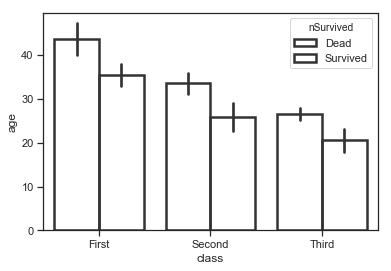

In [78]:
sns.barplot(x='class', y='age', hue='nSurvived', 
            hue_order=['Dead', 'Survived'], data=tdf, orient='v', 
            order=['First', 'Second', 'Third'], linewidth=2.5, 
            facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")


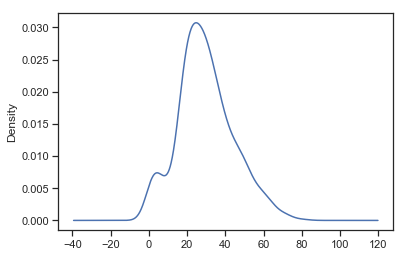

In [79]:
kde_input = tdf['age'].dropna()
kde_input.plot.density()

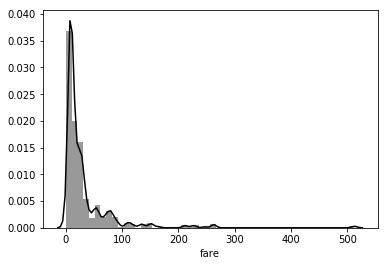

In [50]:
dist_values = tdf['fare']
sns.distplot(dist_values, bins=50, color='k')

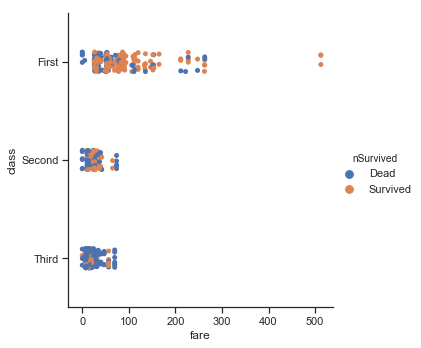

In [68]:
# Originally it's factorplot, after a warning, I changed to catplot
sns.set(style="ticks")
sns.catplot(x="fare", y="class", hue="nSurvived", data=tdf, 
            order=["First", "Second", "Third"])

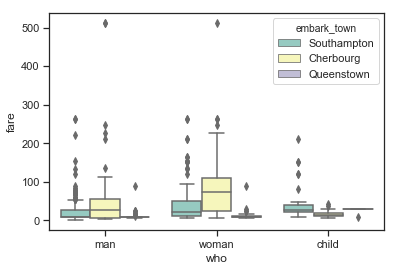

In [75]:
sns.boxplot(x="who", y="fare", hue="embark_town", data=tdf, 
            palette="Set3")

### Big Idea:

The purpose of these visulizations is to explain the details observed from titanic dataset. Since I need to have five different types of chart type, each are appearing to give different proposition as a result. In general, they can be summarized into two different objectives. First, it's to identify the pattern behind survival passenger, and see what they have in common. Second, I want to know what's the average price of a cruise ticket back in 1912.

##### 1. Barplot
In the barplot, I used three variables, class, age, and nSurvived. In this table, I observe that in all three classes, passengers who survived were younger than passenger who didn't.

##### 2. Density
In the density plot, I used only age as my variable. And I discover that passengers on Titanic are generally between age 20 to age 40.

##### 3. Distplot
In the displot, I used fare price as the variable. I learn that the most fare price seat below 100 pounds.

##### 4. Catplot / Factorplot
In the catplot, I used fare, class and nSurvived. I can see that a lot of first class customer survived because yellow significantly outweigh blue in visual. In contrast, third class customer had the least percent in surviving.

##### 5. Boxplot
In the boxplot, I used who, fare, and embark_town. In these town, southampton belongs to England, Cherbourg belongs to France, and Queenstown belongs to Ireland. Fares for woman were higher than the tickets for man and child. Women who came from France were paying the highest price, which is interesting to find out.
